            TOTAL CASES
TIME                   
2010-10-10         45.0
2010-10-17         67.0
2010-10-24         62.0
2010-10-31         88.0
2010-11-07        134.0
...                 ...
2021-09-26         29.0
2021-10-03         46.0
2021-10-10         58.0
2021-10-17         45.0
2021-10-24         25.0

[575 rows x 1 columns]
TOTAL CASES    1936.046957
dtype: float64
done
575
[[-0.44256638]
 [-0.43035978]
 [-0.41945175]
 [-0.37426136]
 [-0.31452693]
 [-0.14285539]
 [ 0.01764842]
 [ 0.3521612 ]
 [ 0.43293254]
 [ 0.70485403]
 [ 1.29830257]
 [ 2.5872676 ]
 [ 3.80013616]
 [ 3.30018499]
 [ 2.99216312]
 [ 3.42562728]
 [ 4.0762131 ]
 [ 4.93560969]
 [ 4.94080399]
 [ 4.66472705]
 [ 4.15438728]
 [ 3.55262787]
 [ 3.12643572]
 [ 2.45715044]
 [ 0.86535784]
 [-0.24388448]
 [-0.42516548]
 [-0.47373217]
 [-0.48152361]
 [-0.49632736]
 [-0.49684679]
 [-0.49762594]
 [-0.49892451]
 [-0.49918423]
 [-0.50152166]
 [-0.49736622]
 [-0.49970366]
 [-0.49814537]
 [-0.49918423]
 [-0.49996337]
 [-0.49996337

/Users/amypaul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.430447, expected=-0.430360
predicted=-0.422673, expected=-0.419452
predicted=-0.413860, expected=-0.374261
predicted=-0.350007, expected=-0.314527
predicted=-0.280072, expected=-0.142855


/Users/amypaul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.048154, expected=0.017648
predicted=0.110396, expected=0.352161
predicted=0.536269, expected=0.432933
predicted=0.484783, expected=0.704854
predicted=0.841019, expected=1.298303
predicted=1.638510, expected=2.587268
predicted=3.410007, expected=3.800136
predicted=4.633308, expected=3.300185
predicted=2.841376, expected=2.992163
predicted=2.845608, expected=3.425627
predicted=3.848171, expected=4.076213
predicted=4.424697, expected=4.935610
predicted=5.303755, expected=4.940804
predicted=4.786944, expected=4.664727
predicted=4.567293, expected=4.154387
predicted=4.002898, expected=3.552628
predicted=3.370651, expected=3.126436
predicted=2.947662, expected=2.457150
predicted=2.053243, expected=0.865358
predicted=-0.236426, expected=-0.243884
predicted=-0.884983, expected=-0.425165
predicted=-0.442206, expected=-0.473732
predicted=-0.628016, expected=-0.481524
predicted=-0.672437, expected=-0.496327
predicted=-0.605670, expected=-0.496847
predicted=-0.510005, expected=-0.4976

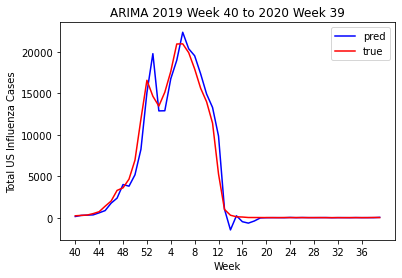

In [69]:
import matplotlib.pyplot as plt
import pandas
from datetime import datetime
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
datafile = 'preprocessed_data.csv'

if __name__ == '__main__':
    # Convert data to datetime
    data = pandas.read_csv(datafile)
    data["YEAR"] = data["YEAR"].astype(str) + " " + data["WEEK"].astype(str)
    for i in range(data.shape[0]):
        data.at[i, "YEAR"] = datetime.strptime(data.at[i, "YEAR"] + ' 0', "%Y %W %w")
    data = data.drop(columns=["WEEK", "REGION"])
    data = data.rename(columns={"YEAR": "TIME"})
    new_data = data.groupby(["TIME"]).sum()["TOTAL CASES"]
    new_data.to_csv("arima_test.csv")
    new_data = pandas.read_csv("arima_test.csv", header=0, index_col=0)
    print(new_data)
    mean = new_data.mean()
    print(mean)
    std = new_data.std()
    new_data = (new_data - mean) / std 
    n = 52
    print('done')
    X = new_data.values
    size = 363
    print(len(X))
    train, test = X[0:size], X[468:520]
    print(test)
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    weeks = [i for i in range(52)]
    print(predictions)
    print("std", std["TOTAL CASES"])
    print("mean", mean["TOTAL CASES"])
    predictions = np.array(predictions) * std["TOTAL CASES"] + mean["TOTAL CASES"]
    print(predictions)
    test = np.array(test) * std["TOTAL CASES"] + mean["TOTAL CASES"]
    plt.plot(weeks, predictions, label="pred", color="blue")
    plt.plot(weeks, test, label="true", color="red")
    plt.title(f"ARIMA 2019 Week 40 to 2020 Week 39")
    week_labels = [i % 52 + 1 for i in range(39, 52+39, 4)]
    plt.xticks(weeks[::4], week_labels)
    plt.xlabel("Week")
    plt.ylabel("Total US Influenza Cases")
    plt.legend()
    print(f"MSE: {mean_squared_error(predictions, test)}")
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # # plot forecasts against actual outcomes
    # plt.plot(test)
    # plt.plot(predictions, color='red')
    # plt.show()

In [52]:
# import matplotlib.pyplot as plt
# import pandas
# from datetime import datetime
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from sklearn.metrics import mean_squared_error
# datafile = 'preprocessed_data.csv'

# if __name__ == '__main__':
#     # Convert data to datetime
#     data = pandas.read_csv(datafile)
#     data["YEAR"] = data["YEAR"].astype(str) + " " + data["WEEK"].astype(str)
#     for i in range(data.shape[0]):
#         data.at[i, "YEAR"] = datetime.strptime(data.at[i, "YEAR"] + ' 0', "%Y %W %w")
#     data = data.drop(columns=["WEEK", "REGION"])
#     data = data.rename(columns={"YEAR": "TIME"})
#     new_data = data.groupby(["TIME"]).sum()["TOTAL CASES"]
#     new_data.to_csv("arima_test.csv")
#     new_data = pandas.read_csv("arima_test.csv", header=0, index_col=0)
#     print(new_data)
#     mean = new_data.mean()
#     print("mean", mean)
#     std = new_data.std()
#     new_data = (new_data - mean) / std 
#     n = 52
#     print('done')
#     X = new_data.values
#     size = 571
#     print(len(X))
#     #train = X[415:571]
#     train = X[0:571]
#     history = [x for x in train]
#     predictions = list()
#     model = ARIMA(history, order=(10,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast(steps=52)
#     predictions = output
#     #obs = test[t]
#     #history.append([yhat])
#     #print(history)
#     #print("yhat", yhat)
#     #print('predicted=%f, expected=%f' % (yhat, obs))
#     # evaluate forecasts
#     weeks = [i for i in range(52)]
#     print(predictions)
#     predictions = np.array(predictions) * std["TOTAL CASES"] + mean["TOTAL CASES"]
#     print(predictions)
#     #test = np.array(test) * std["TOTAL CASES"] + mean["TOTAL CASES"]
#     plt.plot(weeks, predictions, label="pred", color="blue")
#     #plt.plot(weeks, test, label="true", color="red")
#     plt.title(f"ARIMA 2021 Week 40 to 2022 Week 39")
#     week_labels = [i % 52 + 1 for i in range(39, 52+39, 4)]
#     plt.xticks(weeks[::4], week_labels)
#     plt.legend()
#     print(f"MSE: {mean_squared_error(predictions, test)}")
#     rmse = sqrt(mean_squared_error(test, predictions))
#     print('Test RMSE: %.3f' % rmse)
#     # # plot forecasts against actual outcomes
#     # plt.plot(test)
#     # plt.plot(predictions, color='red')
#     # plt.show()

            TOTAL CASES
TIME                   
2010-10-10         45.0
2010-10-17         67.0
2010-10-24         62.0
2010-10-31         88.0
2010-11-07        134.0
...                 ...
2021-09-26         29.0
2021-10-03         46.0
2021-10-10         58.0
2021-10-17         45.0
2021-10-24         25.0

[575 rows x 1 columns]
TOTAL CASES    1936.046957
dtype: float64
done
575
[[-0.44256638]
 [-0.43035978]
 [-0.41945175]
 [-0.37426136]
 [-0.31452693]
 [-0.14285539]
 [ 0.01764842]
 [ 0.3521612 ]
 [ 0.43293254]
 [ 0.70485403]
 [ 1.29830257]
 [ 2.5872676 ]
 [ 3.80013616]
 [ 3.30018499]
 [ 2.99216312]
 [ 3.42562728]
 [ 4.0762131 ]
 [ 4.93560969]
 [ 4.94080399]
 [ 4.66472705]
 [ 4.15438728]
 [ 3.55262787]
 [ 3.12643572]
 [ 2.45715044]
 [ 0.86535784]
 [-0.24388448]
 [-0.42516548]
 [-0.47373217]
 [-0.48152361]
 [-0.49632736]
 [-0.49684679]
 [-0.49762594]
 [-0.49892451]
 [-0.49918423]
 [-0.50152166]
 [-0.49736622]
 [-0.49970366]
 [-0.49814537]
 [-0.49918423]
 [-0.49996337]
 [-0.49996337

/Users/amypaul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.430447, expected=-0.430360
predicted=-0.422673, expected=-0.419452
predicted=-0.413860, expected=-0.374261
predicted=-0.350007, expected=-0.314527
predicted=-0.280072, expected=-0.142855


/Users/amypaul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=-0.048154, expected=0.017648
predicted=0.110396, expected=0.352161
predicted=0.536269, expected=0.432933
predicted=0.484783, expected=0.704854
predicted=0.841019, expected=1.298303
predicted=1.638510, expected=2.587268
predicted=3.410007, expected=3.800136
predicted=4.633308, expected=3.300185
predicted=2.841376, expected=2.992163
predicted=2.845608, expected=3.425627
predicted=3.848171, expected=4.076213
predicted=4.424697, expected=4.935610
predicted=5.303755, expected=4.940804
predicted=4.786944, expected=4.664727
predicted=4.567293, expected=4.154387
predicted=4.002898, expected=3.552628
predicted=3.370651, expected=3.126436
predicted=2.947662, expected=2.457150
predicted=2.053243, expected=0.865358
predicted=-0.236426, expected=-0.243884
predicted=-0.884983, expected=-0.425165
predicted=-0.442206, expected=-0.473732
predicted=-0.628016, expected=-0.481524
predicted=-0.672437, expected=-0.496327
predicted=-0.605670, expected=-0.496847
predicted=-0.510005, expected=-0.4976

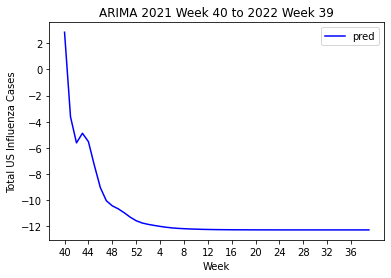

In [70]:
import matplotlib.pyplot as plt
import pandas
from datetime import datetime
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
datafile = 'preprocessed_data.csv'

if __name__ == '__main__':
    # Convert data to datetime
    data = pandas.read_csv(datafile)
    data["YEAR"] = data["YEAR"].astype(str) + " " + data["WEEK"].astype(str)
    for i in range(data.shape[0]):
        data.at[i, "YEAR"] = datetime.strptime(data.at[i, "YEAR"] + ' 0', "%Y %W %w")
    data = data.drop(columns=["WEEK", "REGION"])
    data = data.rename(columns={"YEAR": "TIME"})
    new_data = data.groupby(["TIME"]).sum()["TOTAL CASES"]
    new_data.to_csv("arima_test.csv")
    new_data = pandas.read_csv("arima_test.csv", header=0, index_col=0)
    print(new_data)
    mean = new_data.mean()
    print(mean)
    std = new_data.std()
    new_data = (new_data - mean) / std 
    n = 52
    print('done')
    X = new_data.values
    size = 363
    print(len(X))
    train, test = X[0:size], X[468:520]
    print(test)
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=52)
    # evaluate forecasts
    weeks = [i for i in range(52)]
    print(predictions)
    print("std", std["TOTAL CASES"])
    print("mean", mean["TOTAL CASES"])
    predictions = np.array(predictions) * std["TOTAL CASES"] + mean["TOTAL CASES"]
    print(predictions)
    test = np.array(test) * std["TOTAL CASES"] + mean["TOTAL CASES"]
    plt.plot(weeks, predictions, label="pred", color="blue")
    #plt.plot(weeks, test, label="true", color="red")
    plt.title(f"ARIMA 2021 Week 40 to 2022 Week 39")
    week_labels = [i % 52 + 1 for i in range(39, 52+39, 4)]
    plt.xlabel("Week")
    plt.ylabel("Total US Influenza Cases")
    plt.xticks(weeks[::4], week_labels)
    plt.legend()
    print(f"MSE: {mean_squared_error(predictions, test)}")
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # # plot forecasts against actual outcomes
    # plt.plot(test)
    # plt.plot(predictions, color='red')
    # plt.show()